<a href="https://colab.research.google.com/github/GroverAruquipa/Works_Aprendizaje_estadistico_UBA/blob/main/Practice1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



LInks:https://rpubs.com/Rortizdu/140148
https://www.statmethods.net/stats/rdiagnostics.html
https://rpubs.com/Joaquin_AR/226291
https://advstats.psychstat.org/book/mregression/index.php
https://bookdown.org/ripberjt/labbook/multivariable-linear-regression.html



**Practica_1**

In [9]:
install.packages("googledrive")

install.packages("Hmisc")


install.packages("corrplot")
install.packages("data.table")    
install.packages("GGally")     
install.packages("gridExtra")                                  # Install data.table
install.packages("car")  


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
library("googledrive")                            # Install data.table
library("Hmisc")

library("data.table")
library(corrplot)
library(ggplot2)
library(tidyverse)
library(broom)
library(GGally)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


corrplot 0.88 loaded

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.1     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ dplyr::lag()      

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2




# 1.- Calcular la matriz de correlacion

In [7]:

mydata = read.csv("cemento.csv", header = TRUE, fileEncoding="latin1")
mydata <- fread("cemento.csv",  # Import columns
                      select = c("x1", "x2","x3", "x4","x5","y"))

mydata.cor = cor(mydata)

In [26]:
mydata.rcorr = rcorr(as.matrix(mydata))
mydata.rcorr

      x1    x2    x3    x4    x5     y
x1  1.00 -0.84 -0.24  0.14 -0.35 -0.64
x2 -0.84  1.00  0.33 -0.34  0.34  0.76
x3 -0.24  0.33  1.00 -0.98  0.21  0.85
x4  0.14 -0.34 -0.98  1.00 -0.22 -0.83
x5 -0.35  0.34  0.21 -0.22  1.00  0.33
y  -0.64  0.76  0.85 -0.83  0.33  1.00

n= 14 


P
   x1     x2     x3     x4     x5     y     
x1        0.0002 0.3995 0.6210 0.2176 0.0129
x2 0.0002        0.2444 0.2306 0.2313 0.0014
x3 0.3995 0.2444        0.0000 0.4636 0.0001
x4 0.6210 0.2306 0.0000        0.4439 0.0002
x5 0.2176 0.2313 0.4636 0.4439        0.2533
y  0.0129 0.0014 0.0001 0.0002 0.2533       

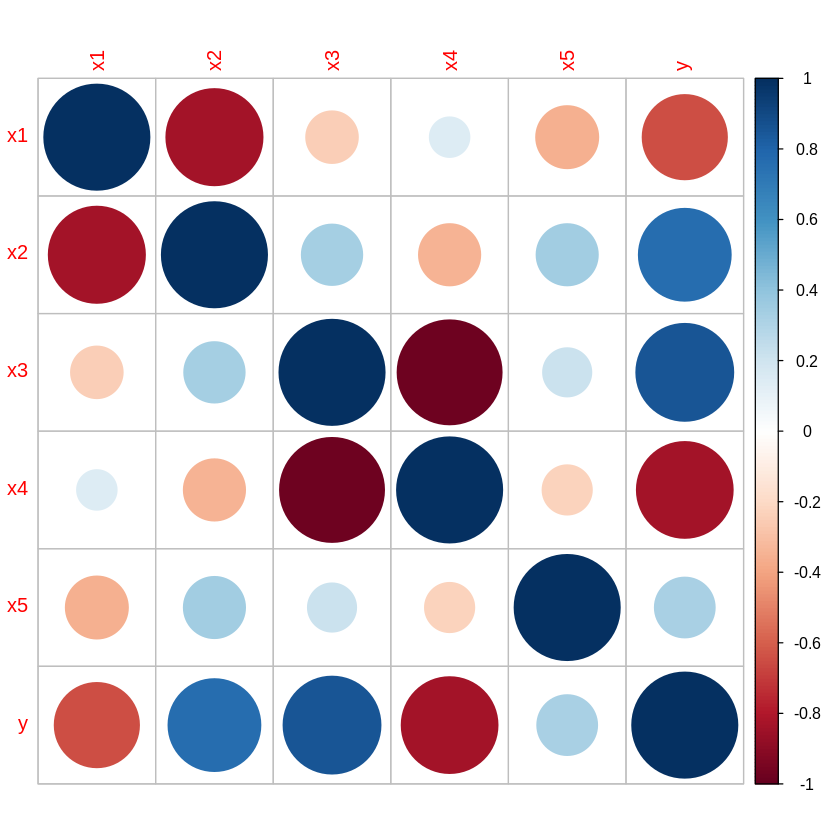

In [27]:
corrplot(mydata.cor)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



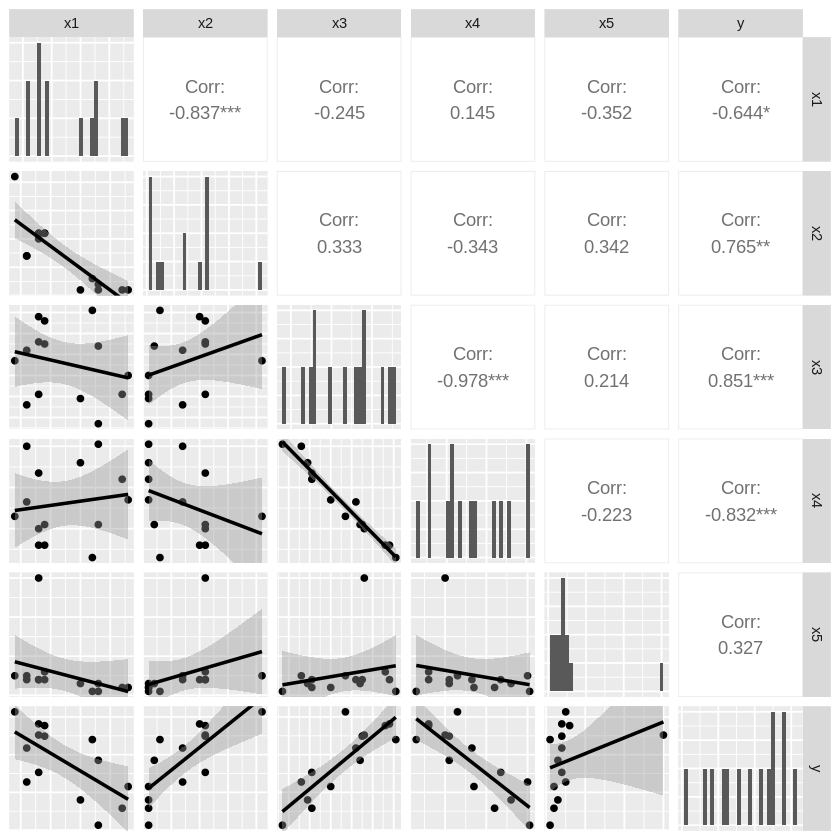

In [54]:
library(GGally)
ggpairs(mydata, lower = list(continuous = "smooth"),
        diag = list(continuous = "barDiag"), axisLabels = "none")

De la matriz de correlacion se puede indicar que:
Las variables con mayor correlacion respecto a **Y** es *x4* con 0.832 y *x3* con 0.851.
De igual froma las variables *x3* y *x4* tiene una alta correlacion de 0.978 lo que indica que puede ser simplificado en una sola en un futuro.


# 2.- Multiple linear regression

In [28]:
library(tidyverse)

In [55]:
 modelo <- lm(y ~ x1 + x2 + x3+x4+x5, data=mydata)
 summary(model)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, data = mydata)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.58166 -2.17473 -0.05122  1.84522  3.11955 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  73.6101   105.9653   0.695    0.507
x1           -0.4497     1.1312  -0.398    0.701
x2            1.2995     1.0660   1.219    0.258
x3            0.5630     1.0587   0.532    0.609
x4           -0.1704     1.0494  -0.162    0.875
x5           -0.3859     1.5221  -0.254    0.806

Residual standard error: 2.7 on 8 degrees of freedom
Multiple R-squared:  0.9871,	Adjusted R-squared:  0.979 
F-statistic: 122.2 on 5 and 8 DF,  p-value: 2.48e-07


In [40]:
plot(fit)

El modelo de regresion lineal es capaz de explicar el 98.71% de la variabilidad observada. EL P-VALUE de 2.48e-07 es altamente significtivo por lo que se puede acpetar que el modelo no es al azar

# SELECCIONAR EL MEJOR MODELO

In [56]:
step(object = modelo, direction = "both", trace = 1)

Start:  AIC=31.98
y ~ x1 + x2 + x3 + x4 + x5

       Df Sum of Sq    RSS    AIC
- x4    1    0.1922 58.516 30.023
- x5    1    0.4687 58.792 30.089
- x1    1    1.1523 59.476 30.251
- x3    1    2.0618 60.385 30.464
<none>              58.323 31.977
- x2    1   10.8348 69.158 32.363

Step:  AIC=30.02
y ~ x1 + x2 + x3 + x5

       Df Sum of Sq     RSS    AIC
- x5    1      0.28   58.79 28.090
<none>                58.52 30.023
- x1    1     11.22   69.73 30.479
+ x4    1      0.19   58.32 31.977
- x2    1    274.60  333.12 52.372
- x3    1   1791.78 1850.29 76.377

Step:  AIC=28.09
y ~ x1 + x2 + x3

       Df Sum of Sq     RSS    AIC
<none>                58.79 28.090
- x1    1     10.95   69.74 28.480
+ x5    1      0.28   58.52 30.023
+ x4    1      0.00   58.79 30.089
- x2    1    274.56  333.36 50.382
- x3    1   1813.38 1872.17 74.541



Call:
lm(formula = y ~ x1 + x2 + x3, data = mydata)

Coefficients:
(Intercept)           x1           x2           x3  
    55.8768      -0.2637       1.4653       0.7336  


Segun este analisis el mejor modelo es:

In [58]:
modelo <- (lm(formula = y ~ x1 + x2 + x3 
              , data = mydata))
summary(modelo)


Call:
lm(formula = y ~ x1 + x2 + x3, data = mydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6827 -2.0225 -0.0239  1.7402  3.3238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 55.87675    3.97307  14.064 6.48e-08 ***
x1          -0.26371    0.19328  -1.364    0.202    
x2           1.46531    0.21442   6.834 4.55e-05 ***
x3           0.73362    0.04177  17.562 7.62e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.425 on 10 degrees of freedom
Multiple R-squared:  0.987,	Adjusted R-squared:  0.9831 
F-statistic: 252.5 on 3 and 10 DF,  p-value: 1.011e-09


De esta forma los intervalos de confianza para este modelo es:

In [60]:
confint(lm(formula = y ~ x1 + x2 + x3
            , data = mydata))

,2.5 %,97.5 %
(Intercept),47.0241980,64.7293052
x1,-0.6943546,0.1669332
x2,0.9875460,1.9430789
x3,0.6405471,0.8266983


**Validacion de condiciones para la regresion multiple**

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



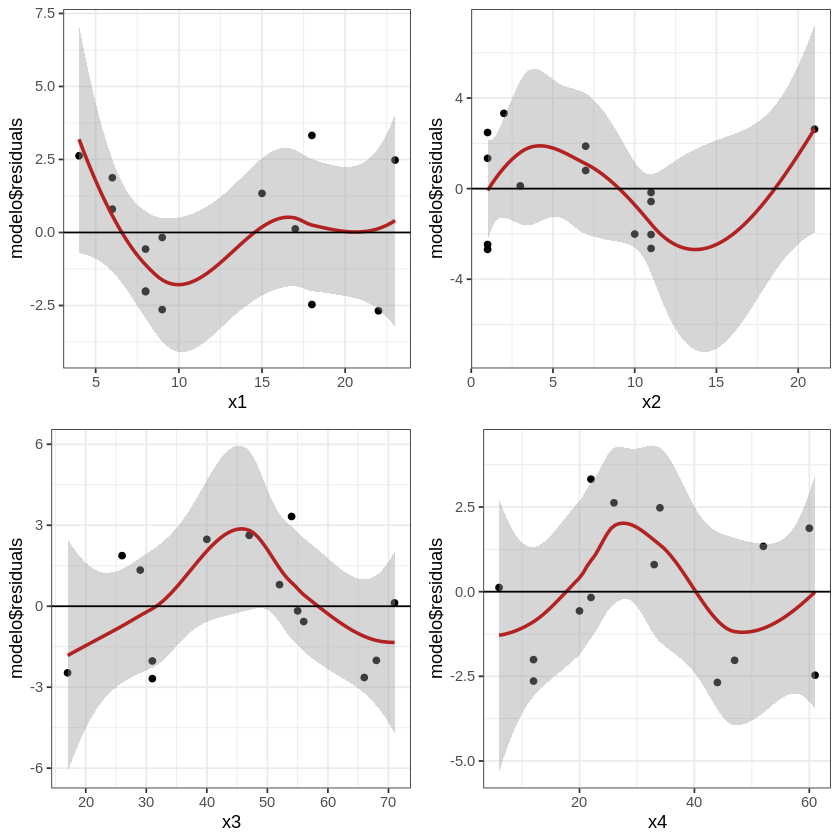

In [64]:
library(ggplot2)
library(gridExtra)
plot1 <- ggplot(data = mydata, aes(x1, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
plot2 <- ggplot(data = mydata, aes(x2, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
plot3 <- ggplot(data = mydata, aes(x3, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
plot4 <- ggplot(data = mydata, aes(x4, modelo$residuals)) +
    geom_point() + geom_smooth(color = "firebrick") + geom_hline(yintercept = 0) +
    theme_bw()
grid.arrange(plot1, plot2, plot3, plot4)

# HIPTOTESIS TESTING

*INdividual regression*

In [43]:
t<- -0.449/1.1312
2*(1-pt(t, 96))

[1] 1.307695

*Testing with F *

In [50]:
F <- (12 - 5 -1)/5*0.3997/(1-0.9871)
1 - pf(F, 5, 12)

[1] 6.72648e-07

In [ ]:
library(GGally)
ggpairs(datos, lower = list(continuous = "smooth"),
        diag = list(continuous = "barDiag"), axisLabels = "none")

# 3.- Suma de las 5 covariables

In [20]:
Datos <- fread("cemento.csv",  # Import columns
                      select = c("x1", "x2","x3", "x4","x5"))

Datos

x1,x2,x3,x4,x5
<int>,<int>,<int>,<int>,<dbl>
6,7,26,60,2.5
15,1,29,52,2.3
8,11,56,20,5.0
8,11,31,47,2.4
6,7,52,33,2.4
9,11,55,22,2.4
17,3,71,6,2.1
22,1,31,44,2.2
18,2,54,22,2.3


In [21]:
Datos$NumPatatasTotal = rowSums (Datos)
Datos$NumPatatasTotal


[1] 101.5  99.3 100.0  99.4 100.4  99.4  99.1 100.2  98.3 100.5 100.2 100.6
[13] 100.4  99.1

En funcion a la suma de variables se observa que x3 y x4 tienen o deberian tener un mayor impacto en el modelo, respecto a las demas variables del modelo.

In [26]:
aux1=data.frame(Datos$NumPatatasTotal)



ERROR: ignored

# 4. Nuevo ajuste lineal con variables que mas contribuyan